


#Step 1 IMPORT CV2 Library and Basic function to read an image



In [1]:
import cv2
# The patch file for using imshow function
from google.colab.patches import cv2_imshow   
import matplotlib.pyplot as plt

#Step 2: Convert to GrayScale

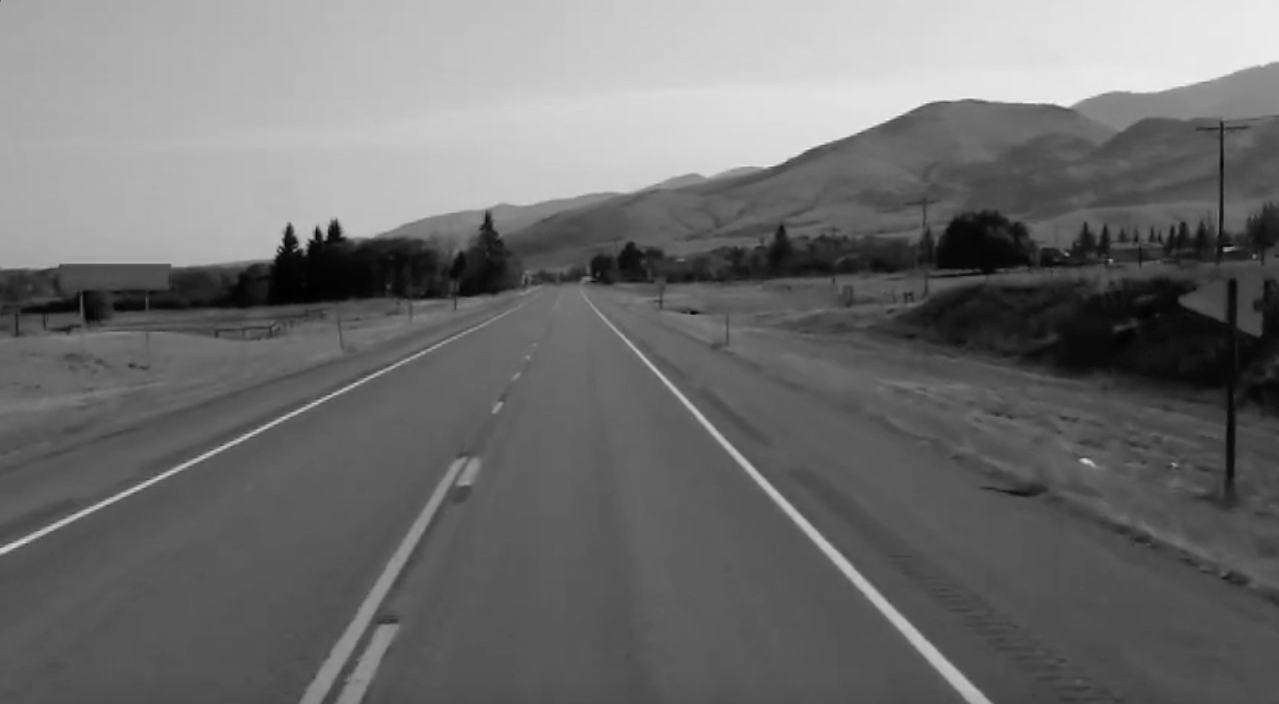

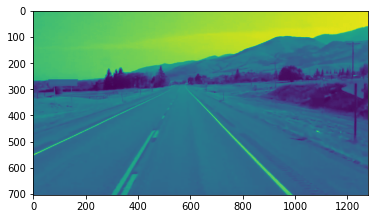

In [2]:
# Function to read an image
# image = cv2.imread("/content/drive/My Drive/GOOGLE COLAB NOTEBOOKS/LANE DETECTION/test_image.jpg")

# Function to read image in grayscale format
image = cv2.imread("/content/drive/My Drive/GOOGLE COLAB NOTEBOOKS/LANE DETECTION/test_image.jpg", 0)

# Function to display the image
cv2_imshow(image)

plt.imshow(image)

#Step 3: Applying Gaussian Blur on the Image

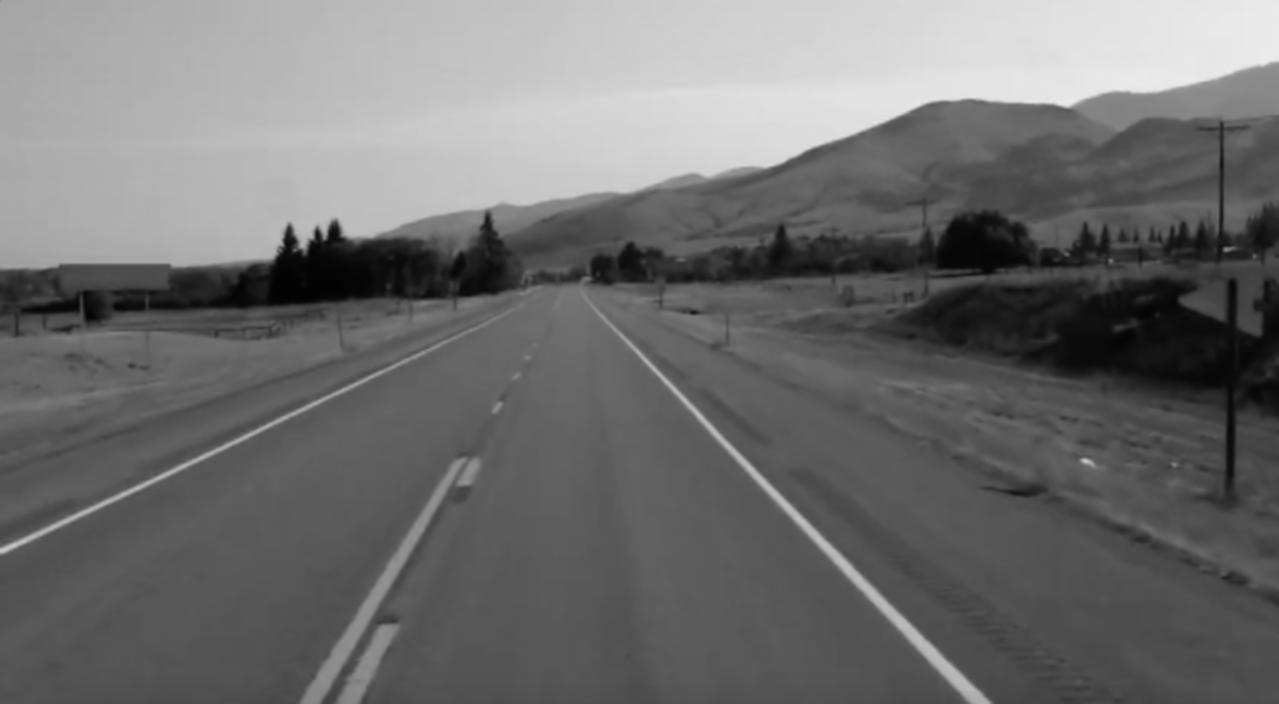

In [3]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

cv2_imshow(blurred_image)

#Step 4: Shows the edges in image after applying Canny method
####The Canny Method measures the adjacent changes in intensity in all directions, x and y.
Outlines the maximum change in intensity

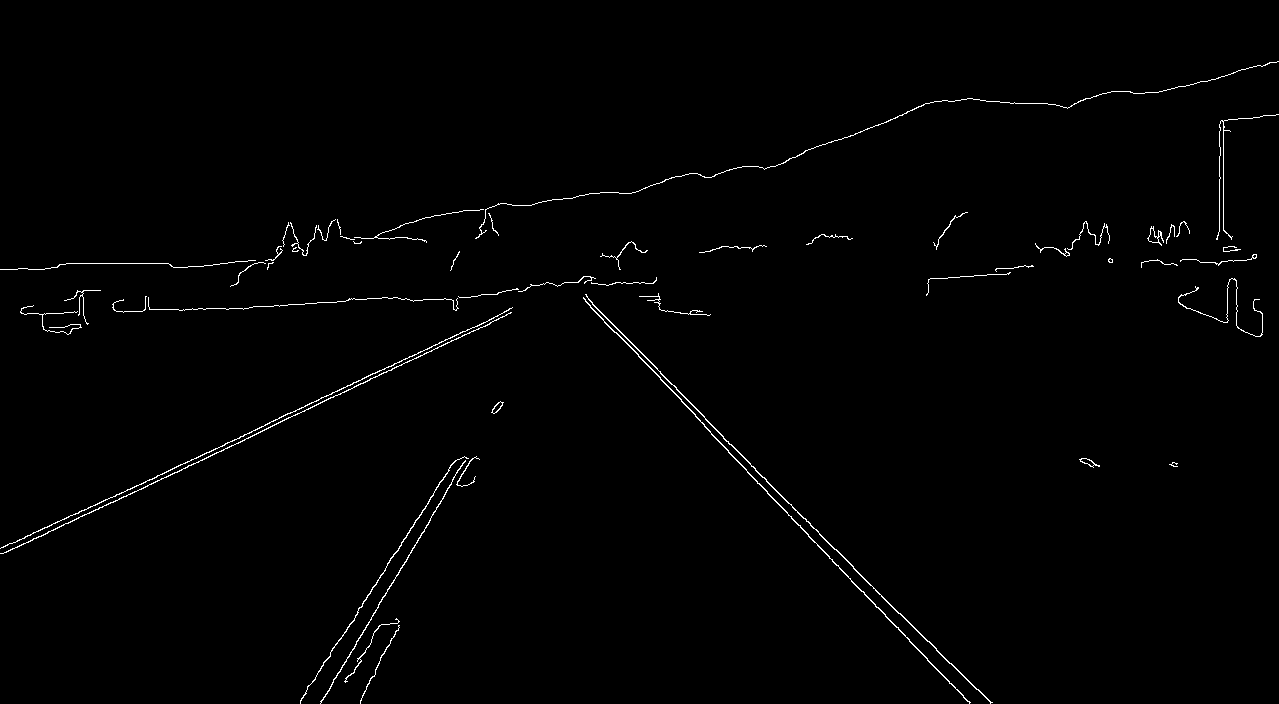

In [4]:
canny = cv2.Canny(blurred_image, 50, 150)

cv2_imshow(canny)

#Step 5: Isolate area of interest in the Image

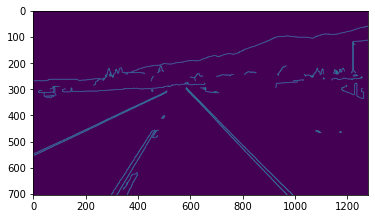

In [5]:
plt.imshow(canny)

####Finding the area of interest

In [6]:
import numpy as np

def region_of_interest(img):
  height = img.shape[0]
  triangle = np.array([
                       [(200, height), (1100, height), (550, 250)]
                      ])
  mask = np.zeros_like(img)
  cv2.fillPoly(mask, triangle, 255)
  return mask


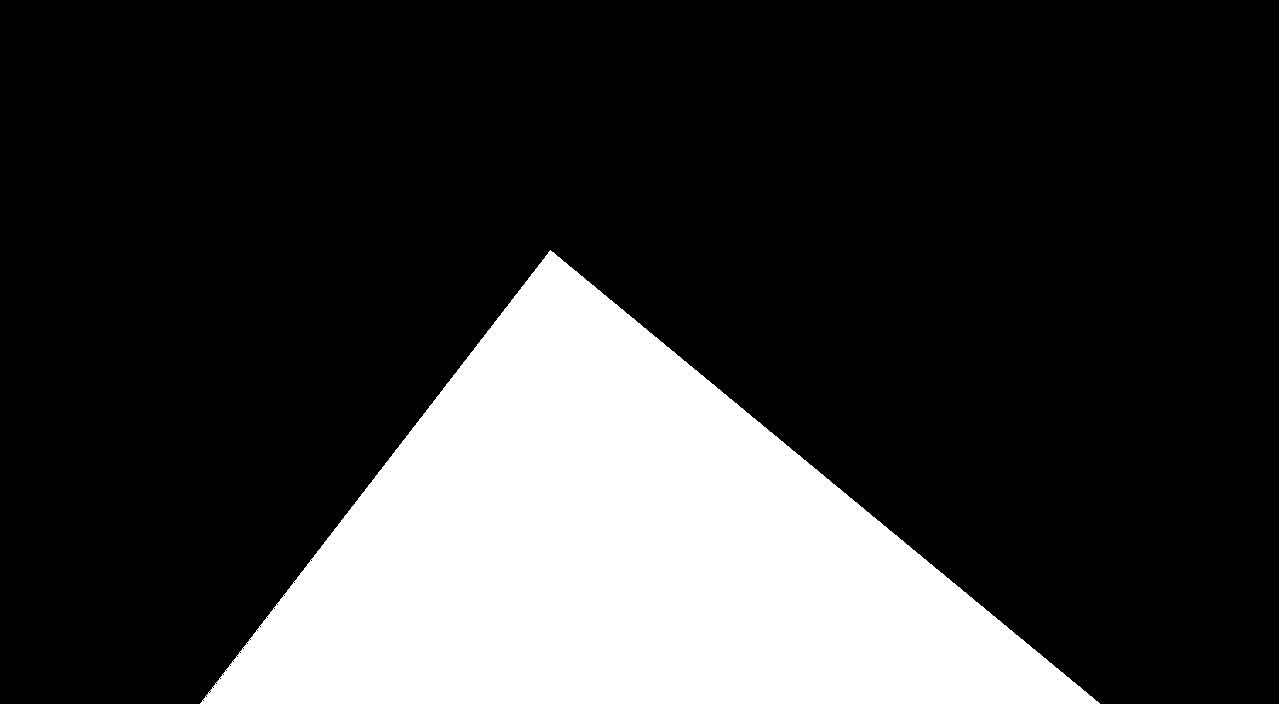

In [7]:
cv2_imshow(region_of_interest(canny))

####Isolate the region of interest by usking the mask created

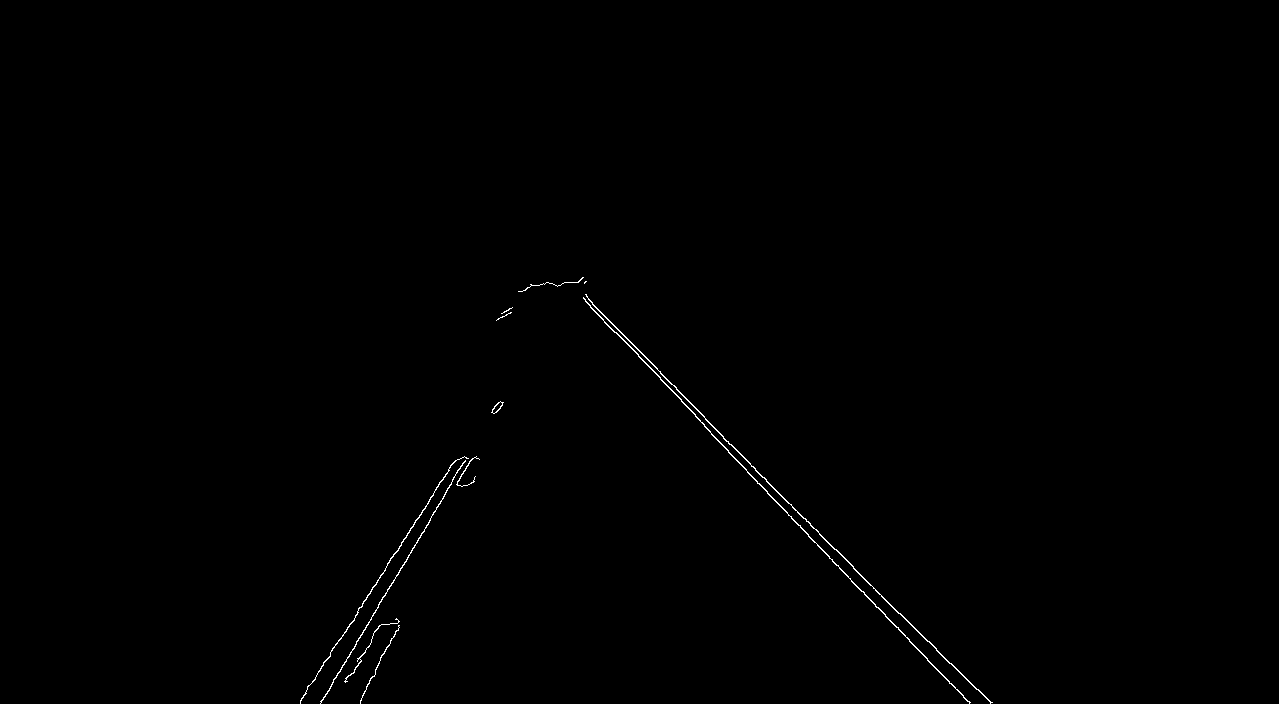

In [8]:
cropped_image = cv2.bitwise_and(canny, region_of_interest(canny))
cv2_imshow(cropped_image)

#Step 6: Detect the Straight Lines in the Isolated Region which will be our lane lines  **Hough Transform**

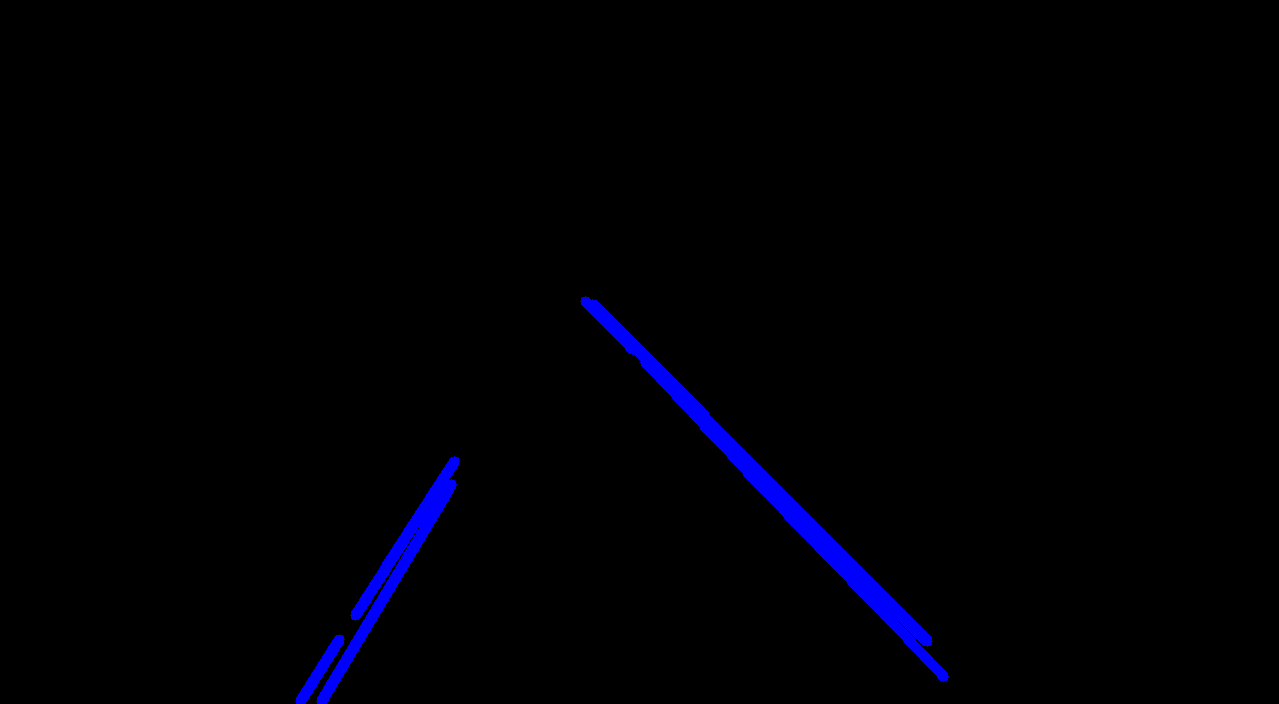

In [28]:
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
image = cv2.imread("/content/drive/My Drive/GOOGLE COLAB NOTEBOOKS/LANE DETECTION/test_image.jpg")
def displayLines(img, lin):
  line_image = np.zeros_like(img)
  if lin is not None:
    for line in lin:
      # print(line)
      x1, y1, x2, y2 = line.reshape(4)
      cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10) 
  return line_image

line_image = displayLines(image, lines)
cv2_imshow(line_image)


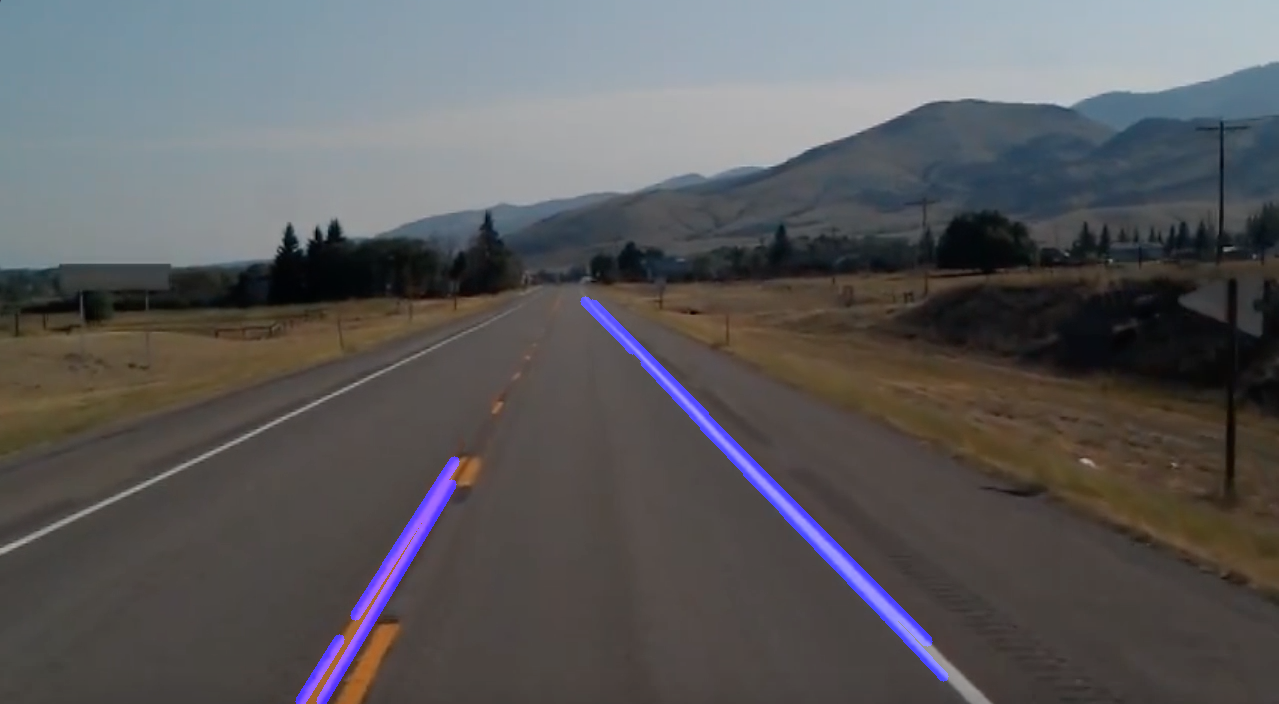

In [21]:
# Combine the images

combined_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)
cv2_imshow(combined_image)

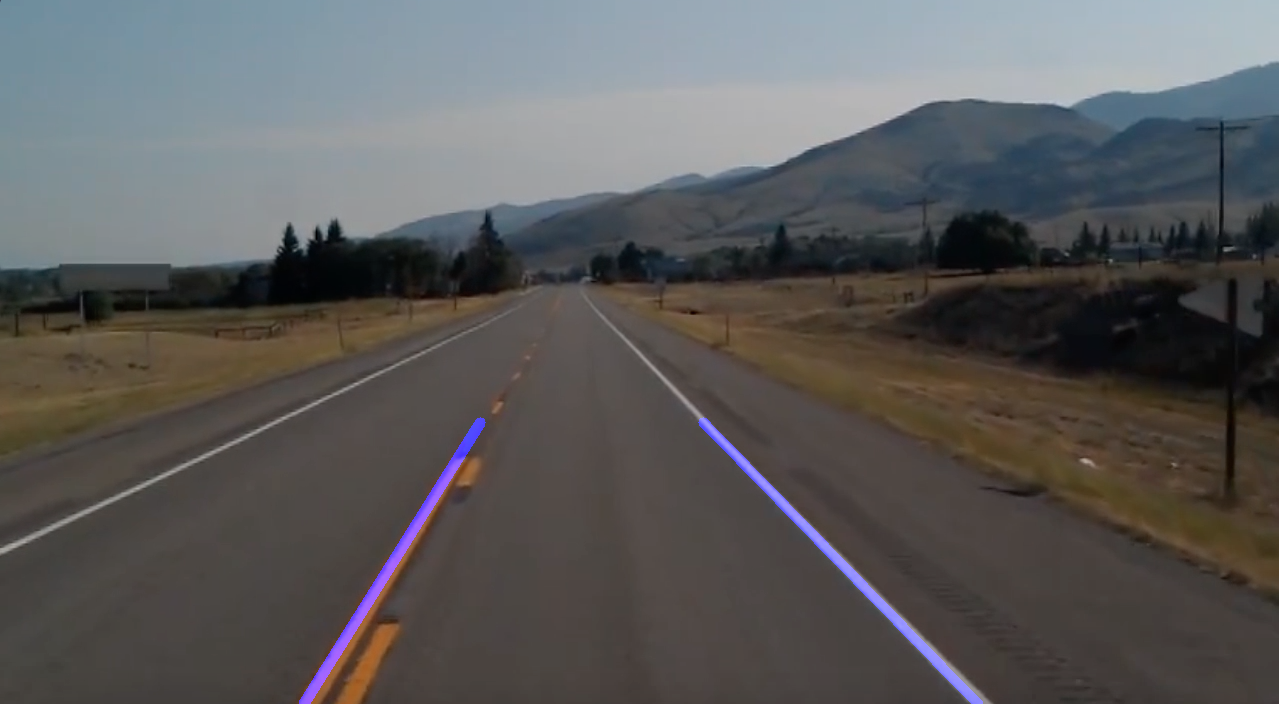

In [31]:
def make_coordinates(image, line_parameters):
  slope, intercept = line_parameters
  y1 = image.shape[0]
  y2 = int(y1 * (3/ 5))
  x1 = int((y1 - intercept)/slope)
  x2 = int((y2 - intercept)/slope)
  return np.array([x1, y1, x2, y2])

# Lines on the left have a negative slope
# Lines on the right have a positive slope
def average_slope_intercept(image, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    x1, y1, x2, y2 = line.reshape(4)
    parameters = np.polyfit((x1, x2), (y1, y2), 1)
    # print(parameters)
    slope = parameters[0]
    intercept = parameters[1]
    if slope < 0:
      left_fit.append((slope, intercept))
    else:
      right_fit.append((slope, intercept))
  left_fit_avg = np.average(left_fit, axis = 0)
  right_fit_avg = np.average(right_fit, axis = 0)
  left_line = make_coordinates(image, left_fit_avg)
  right_line = make_coordinates(image, right_fit_avg)
  return np.array([left_line, right_line])

averaged_lines = average_slope_intercept(image, lines)
line_image = displayLines(image, averaged_lines)
# cv2_imshow(line_image)
combined_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)
cv2_imshow(combined_image)